# test sleep time accuracy

In [1]:
import matplotlib.rcsetup as rcsetup
print(rcsetup.all_backends)
print("")
%pylab

['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


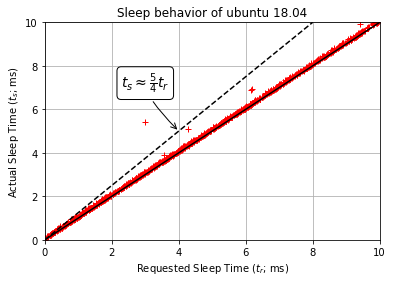

In [2]:
import matplotlib
# matplotlib.use('Tkagg')
import matplotlib.pyplot as plt
# import pylab

import random
from time import sleep
from datetime import datetime, timedelta

max_sleep_time = 0.01

req_sleep = []
act_sleep = []

for samp in range(1000):
    sleep_time = random.random() * max_sleep_time
    req_sleep.append(sleep_time * 1000.)

    start = datetime.now()
    sleep(sleep_time)
    end = datetime.now()

    act_sleep.append((end - start).total_seconds() * 1000.)

plt.figure()

plt.plot(req_sleep, act_sleep, 'r+')
plt.plot([0, max_sleep_time * 1000], [0, max_sleep_time * 1000.], 'k-')
plt.plot([0, 0.8 * max_sleep_time * 1000], [0, max_sleep_time * 1000.], 'k--')
plt.xlabel("Requested Sleep Time ($t_r$; ms)")
plt.ylabel("Actual Sleep Time ($t_s$; ms)")
plt.xlim(0, max_sleep_time * 1000.)
plt.ylim(0, max_sleep_time * 1000.)

plt.annotate(r"$t_s \approx \frac{5}{4} t_r$", xy=(4, 5), xytext=(0.3, 0.7), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=-90,angleB=-45"),
            fontsize=14, bbox=dict(fc='w', ec='k', boxstyle='round'),
            ha='center',
            )   

plt.title("Sleep behavior of ubuntu 18.04")
plt.grid()
plt.savefig("sleeptest.png")
plt.show()